# <center> In context learning of cluster </center>

## 一、设计
设计一个任务来检测 Transformer 在 in-context learning 中的 聚类能力，并考察它在泛化能力（generalization ability）方面的表现，尤其是在面对稍微变化的形状或分布时是否能够正确预测。

## 二、Dataset

数据集设计：

给定的 (x, y) 对来让模型学习如何进行聚类

* 每个样本 xi 代表一个数据点。样本的特征可能是某种图形、数值或者符号表示。假设是二维或者三维的几何形状（比如月牙形状、线段、弯曲的图形等）。
* 每个样本 yi 对应于一个聚类标签，表示该样本属于哪个类别。比如，如果有 k 个聚类，yi 就是一个长度为 k 的 one-hot 向量，表示该样本属于哪个聚类。

### 对于pointset的设定：

1. **坐标点表示（点集表示）**

    二维图形：可以用一组二维坐标（x, y）来表示
    
    ```python
        x_i = [[x1, y1], [x2, y2], ..., [xn, yn]]  # n个坐标点
    ```
    三维图形：对于更复杂的三维cluster，可以使用三维坐标 (x, y, z)



2. **参数化表示（函数式表示）**

    是使用某些函数来描述形状，尤其适合曲线或其他平滑形状。可以为不同的几何形状选择不同的参数化形式，例如，利用极坐标、B样条曲线（B-spline）或Bezier曲线
    
    eg:一个简单的圆弧可以通过以下方式表示
    ```python 
        x_i = [(cos(θ), sin(θ)) for θ in range(0, 360, step)]
    ```
    或者，可以用参数（比如弯曲的角度范围、弯曲的幅度）来定义形状:
    ```python
        x_i = [parameters] 
    ```

3. **直方图/特征向量表示（Feature Vector）**

    eg:
    ```python
        x_i = [面积, 周长, 曲率, 对称性, 凹凸性]  # 特征向量
    ```


4. **图结构表示**

    对于复杂的形状，尤其是具有离散结构的形状（例如带有节点和边的图形），可以将形状表示为图。每个形状可以被表示为图的一个子图，其中图的节点表示形状的基本元素（例如，曲线的控制点），边表示这些元素之间的关系。

    ```python
        x_i = {"nodes": [[x1, y1], [x2, y2], ...], "edges": [(1, 2), (2, 3), ...]}
    ```

### 对于k的设定：

第一阶段讨论低维（可以更好的可视化）：

* 对于2维：现阶段只设定：
    可以产生几个cluster

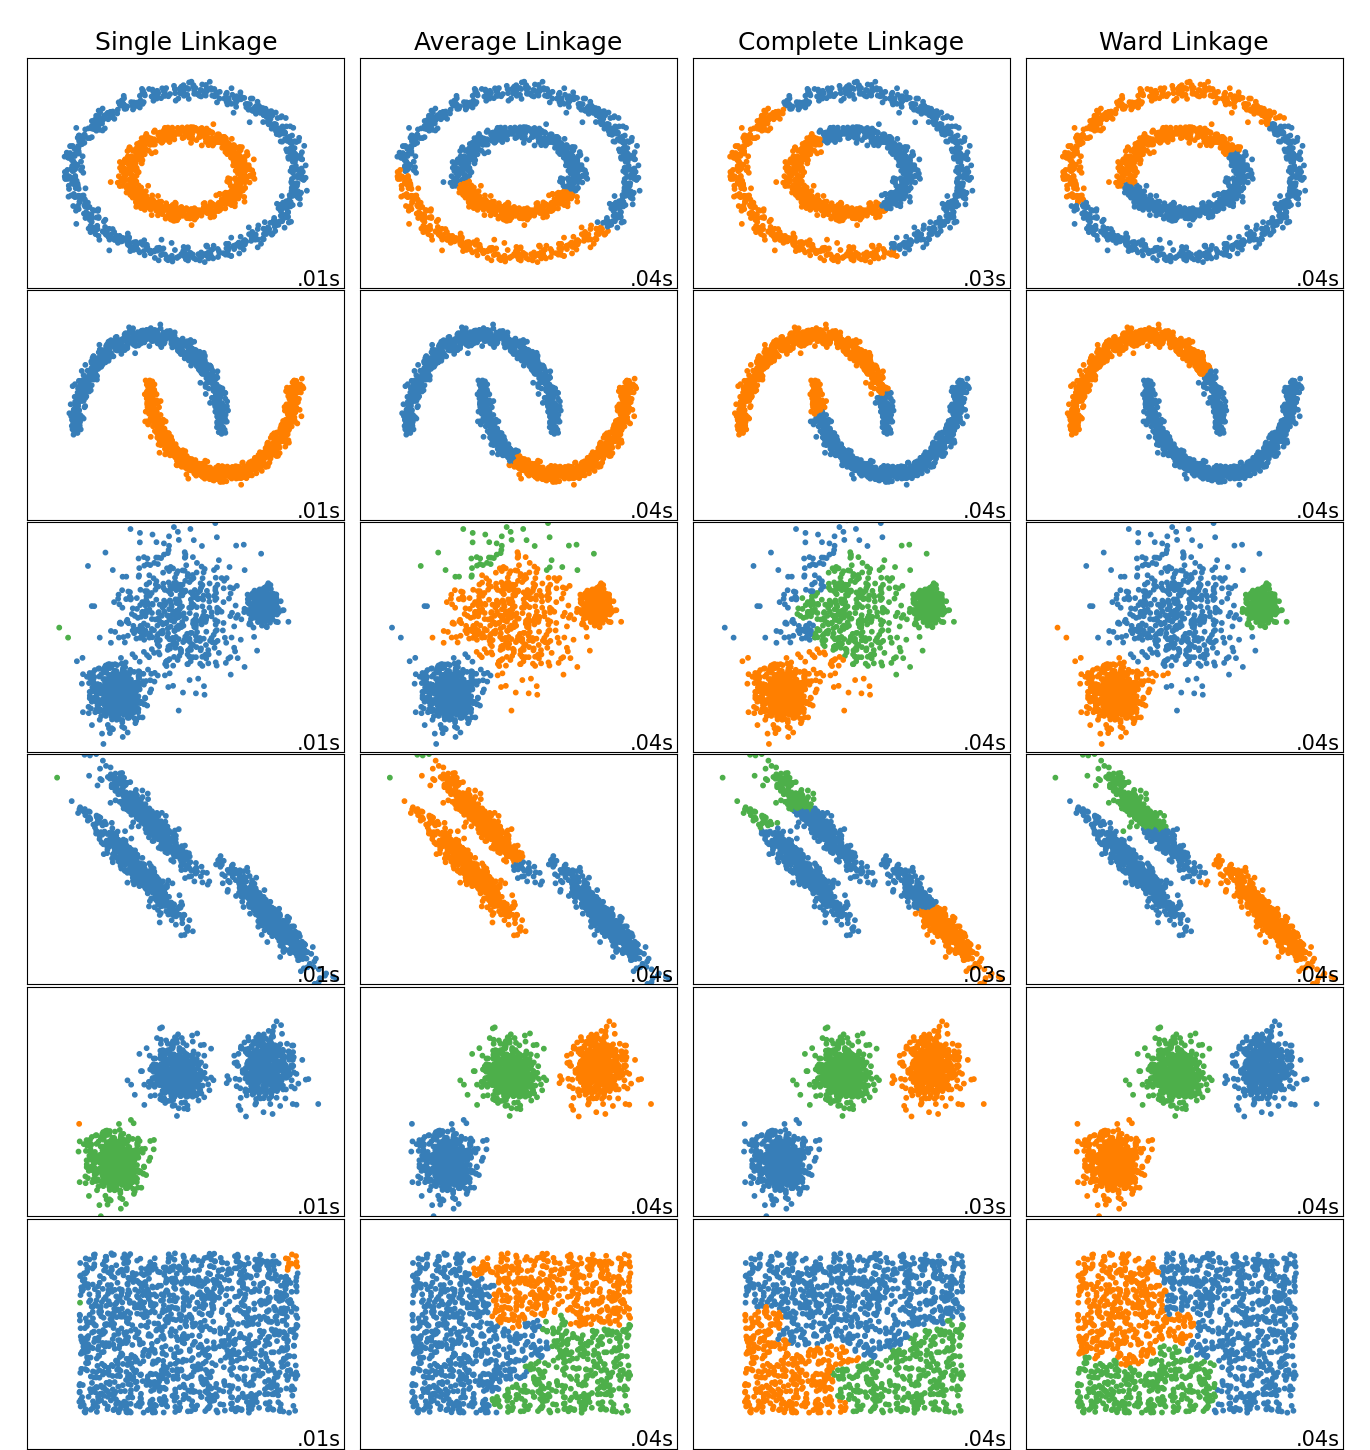



[[-0.36674124  0.92047744]
 [ 1.37252944 -0.48998992]
 [ 0.8247786  -0.17496859]
 [-0.65618069  0.89846327]
 [-1.21194468 -0.13719111]
 [ 0.93705215 -0.32933284]
 [ 1.96026066  0.39761589]
 [ 0.74250219  0.86904121]
 [ 0.51965957  0.3306703 ]
 [-0.03262759  0.80980662]]
[1 1 0 0 0 1 1 0 1 0]
2


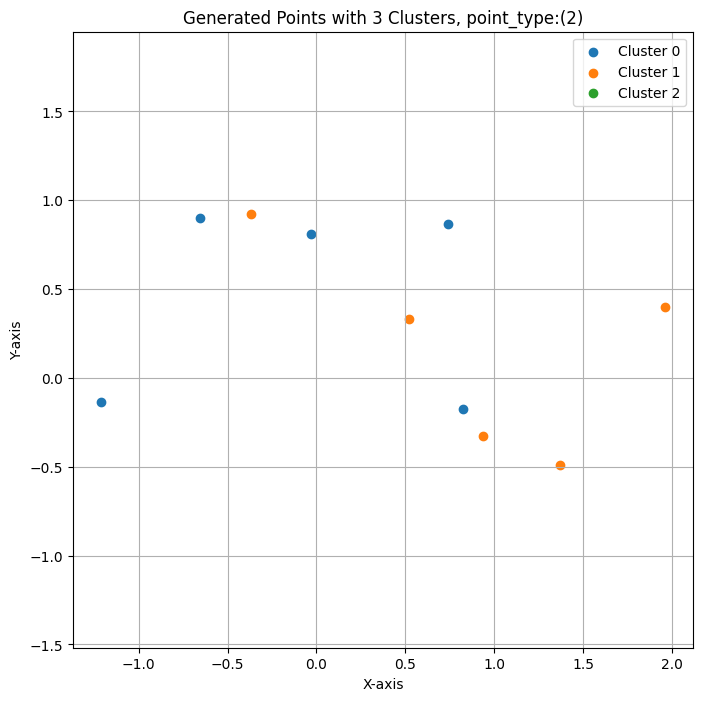

In [2]:
from src.graph import generate_points
import matplotlib.pyplot as plt
import numpy as np
# 生成数据，n_samples=500, k=2, seed=None
N = 10 # 生成的点数
k = 3    # cluster的数量
seed = None # 随机种子
points, point_labels, point_type = generate_points(N, k, seed)

# 将点转换为 NumPy 数组
points_array = np.array(points)

# 绘制散点图
plt.figure(figsize=(8, 8))

print(points)
print(point_labels)
print(point_type)

# 根据聚类标签绘制不同类型的点
for label in range(k):
    # 选择对应标签的点
    cluster_points = points_array[point_labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}')

plt.title(f'Generated Points with {k} Clusters, point_type:({point_type})')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')  # 保持比例
plt.grid()
plt.legend()
plt.show()


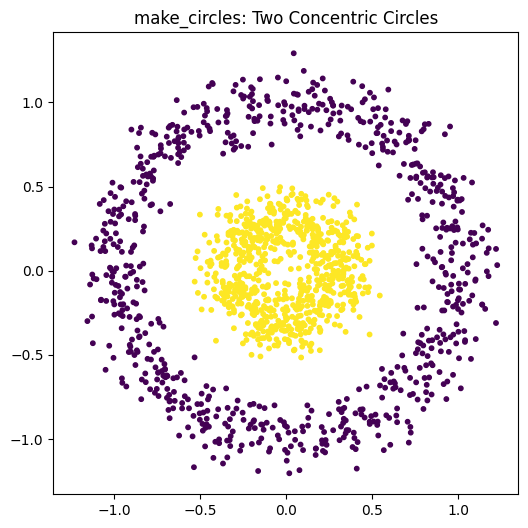

In [110]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# 生成数据，n_samples=500, factor=0.5, noise=0.1
X, y = make_circles(n_samples=1500, factor=0.3, noise=0.1, random_state=42)

# 绘制结果
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
plt.title("make_circles: Two Concentric Circles")
plt.show()


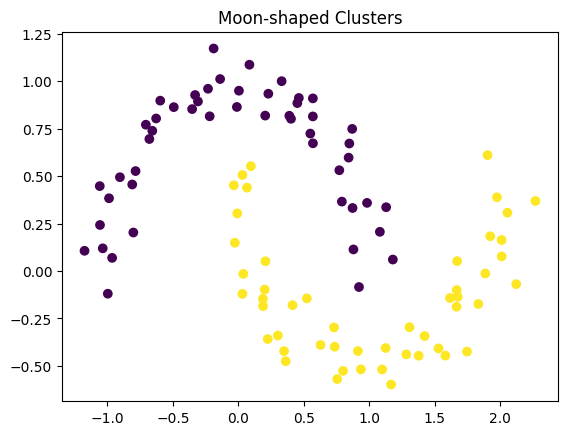

In [32]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# 生成月亮形状的数据
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# 绘制数据
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Moon-shaped Clusters")
plt.show()


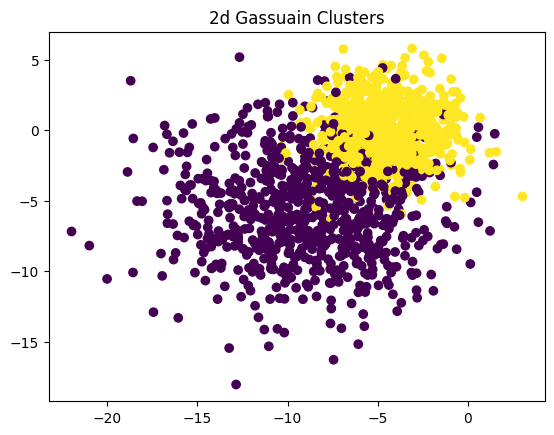

In [16]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# 生成具有不同方差的聚类
n_samples = 1500
cluster_std = np.random.uniform(0, 5, size=2)
varied = make_blobs(
    n_samples=n_samples, centers=2, cluster_std=cluster_std, random_state=170
)

# 生成数据点和标签
X, y = varied

# 可视化生成的数据
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("2d Gassuain Clusters")
plt.show()


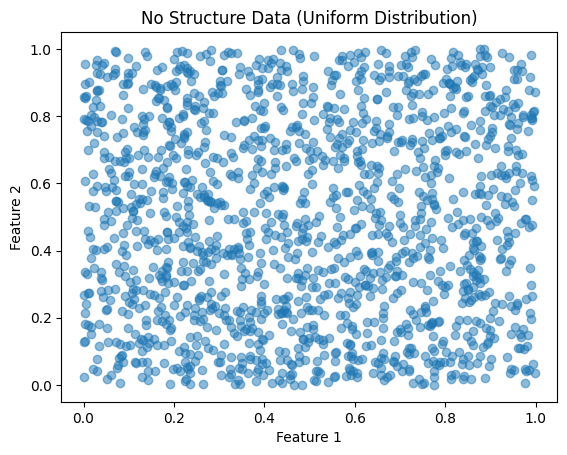

In [46]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(170)
no_structure = rng.rand(n_samples, 3), None

X,y  = no_structure
# 可视化生成的数据
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.title('No Structure Data (Uniform Distribution)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


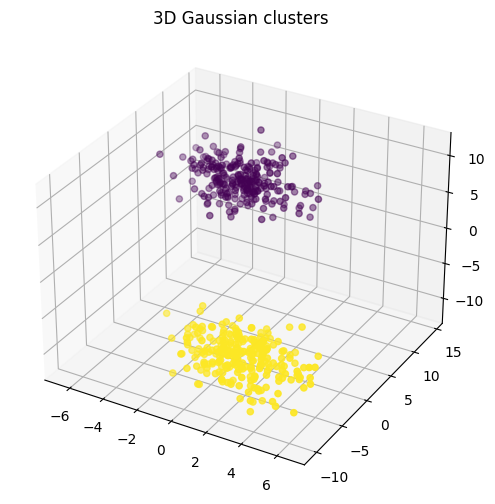

In [35]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
# 生成三维数据
N = 500  # 数据点数量
k = 2   # 聚类数量
cluster_std = np.random.uniform(0.5, 2, size=k)  # 每个聚类的标准差
points, labels = make_blobs(n_samples=N, centers=k, cluster_std=cluster_std, n_features=3, random_state=42)

# 可视化三维数据
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis')
plt.title("3D Gaussian clusters")
plt.show()


疑问： 是否需要normalize？

## 三、Train
对于每个batch，设定N=1，即每次训练的数据都是一组set of point, 根据不同的cluster类别设定，设定k的大小



## 四、Evaluate
评估指标：

1. **Accuracy**：评估模型在测试数据上的准确性，尤其是它在不同形状和变形上的表现。

2. **鲁棒性**：通过加入不同程度的噪声和变化，检查模型在不确定环境下的表现。

3. **可解释性**：通过可视化模型在特定任务下的决策过程，检查模型是否在处理 形状变换 和 上下文学习 时能够做出合理的推断。

评估泛化能力方法：


1. 对已知cluster的样本的改动：

    
    在训练集的基础上对某些样本进行轻微的形变，观察模型是否能根据上下文正确地推断新的聚类标签。

    eg：测试集中的 x_0 是一个月牙形状，但其略微发生了弯曲、旋转等变化。
    模型应当能够根据之前的训练数据（in-context）预测出正确的聚类标签（如这个变形后的月牙仍属于相同的聚类）。
2. 引入噪声：

    将噪声数据输入模型，看它是否能在噪声中仍然找出模式，并进行正确的聚类。

3. 对于未知的cluster的预测：

    对于复杂图形，能否预测出几个基础的cluster的组合？

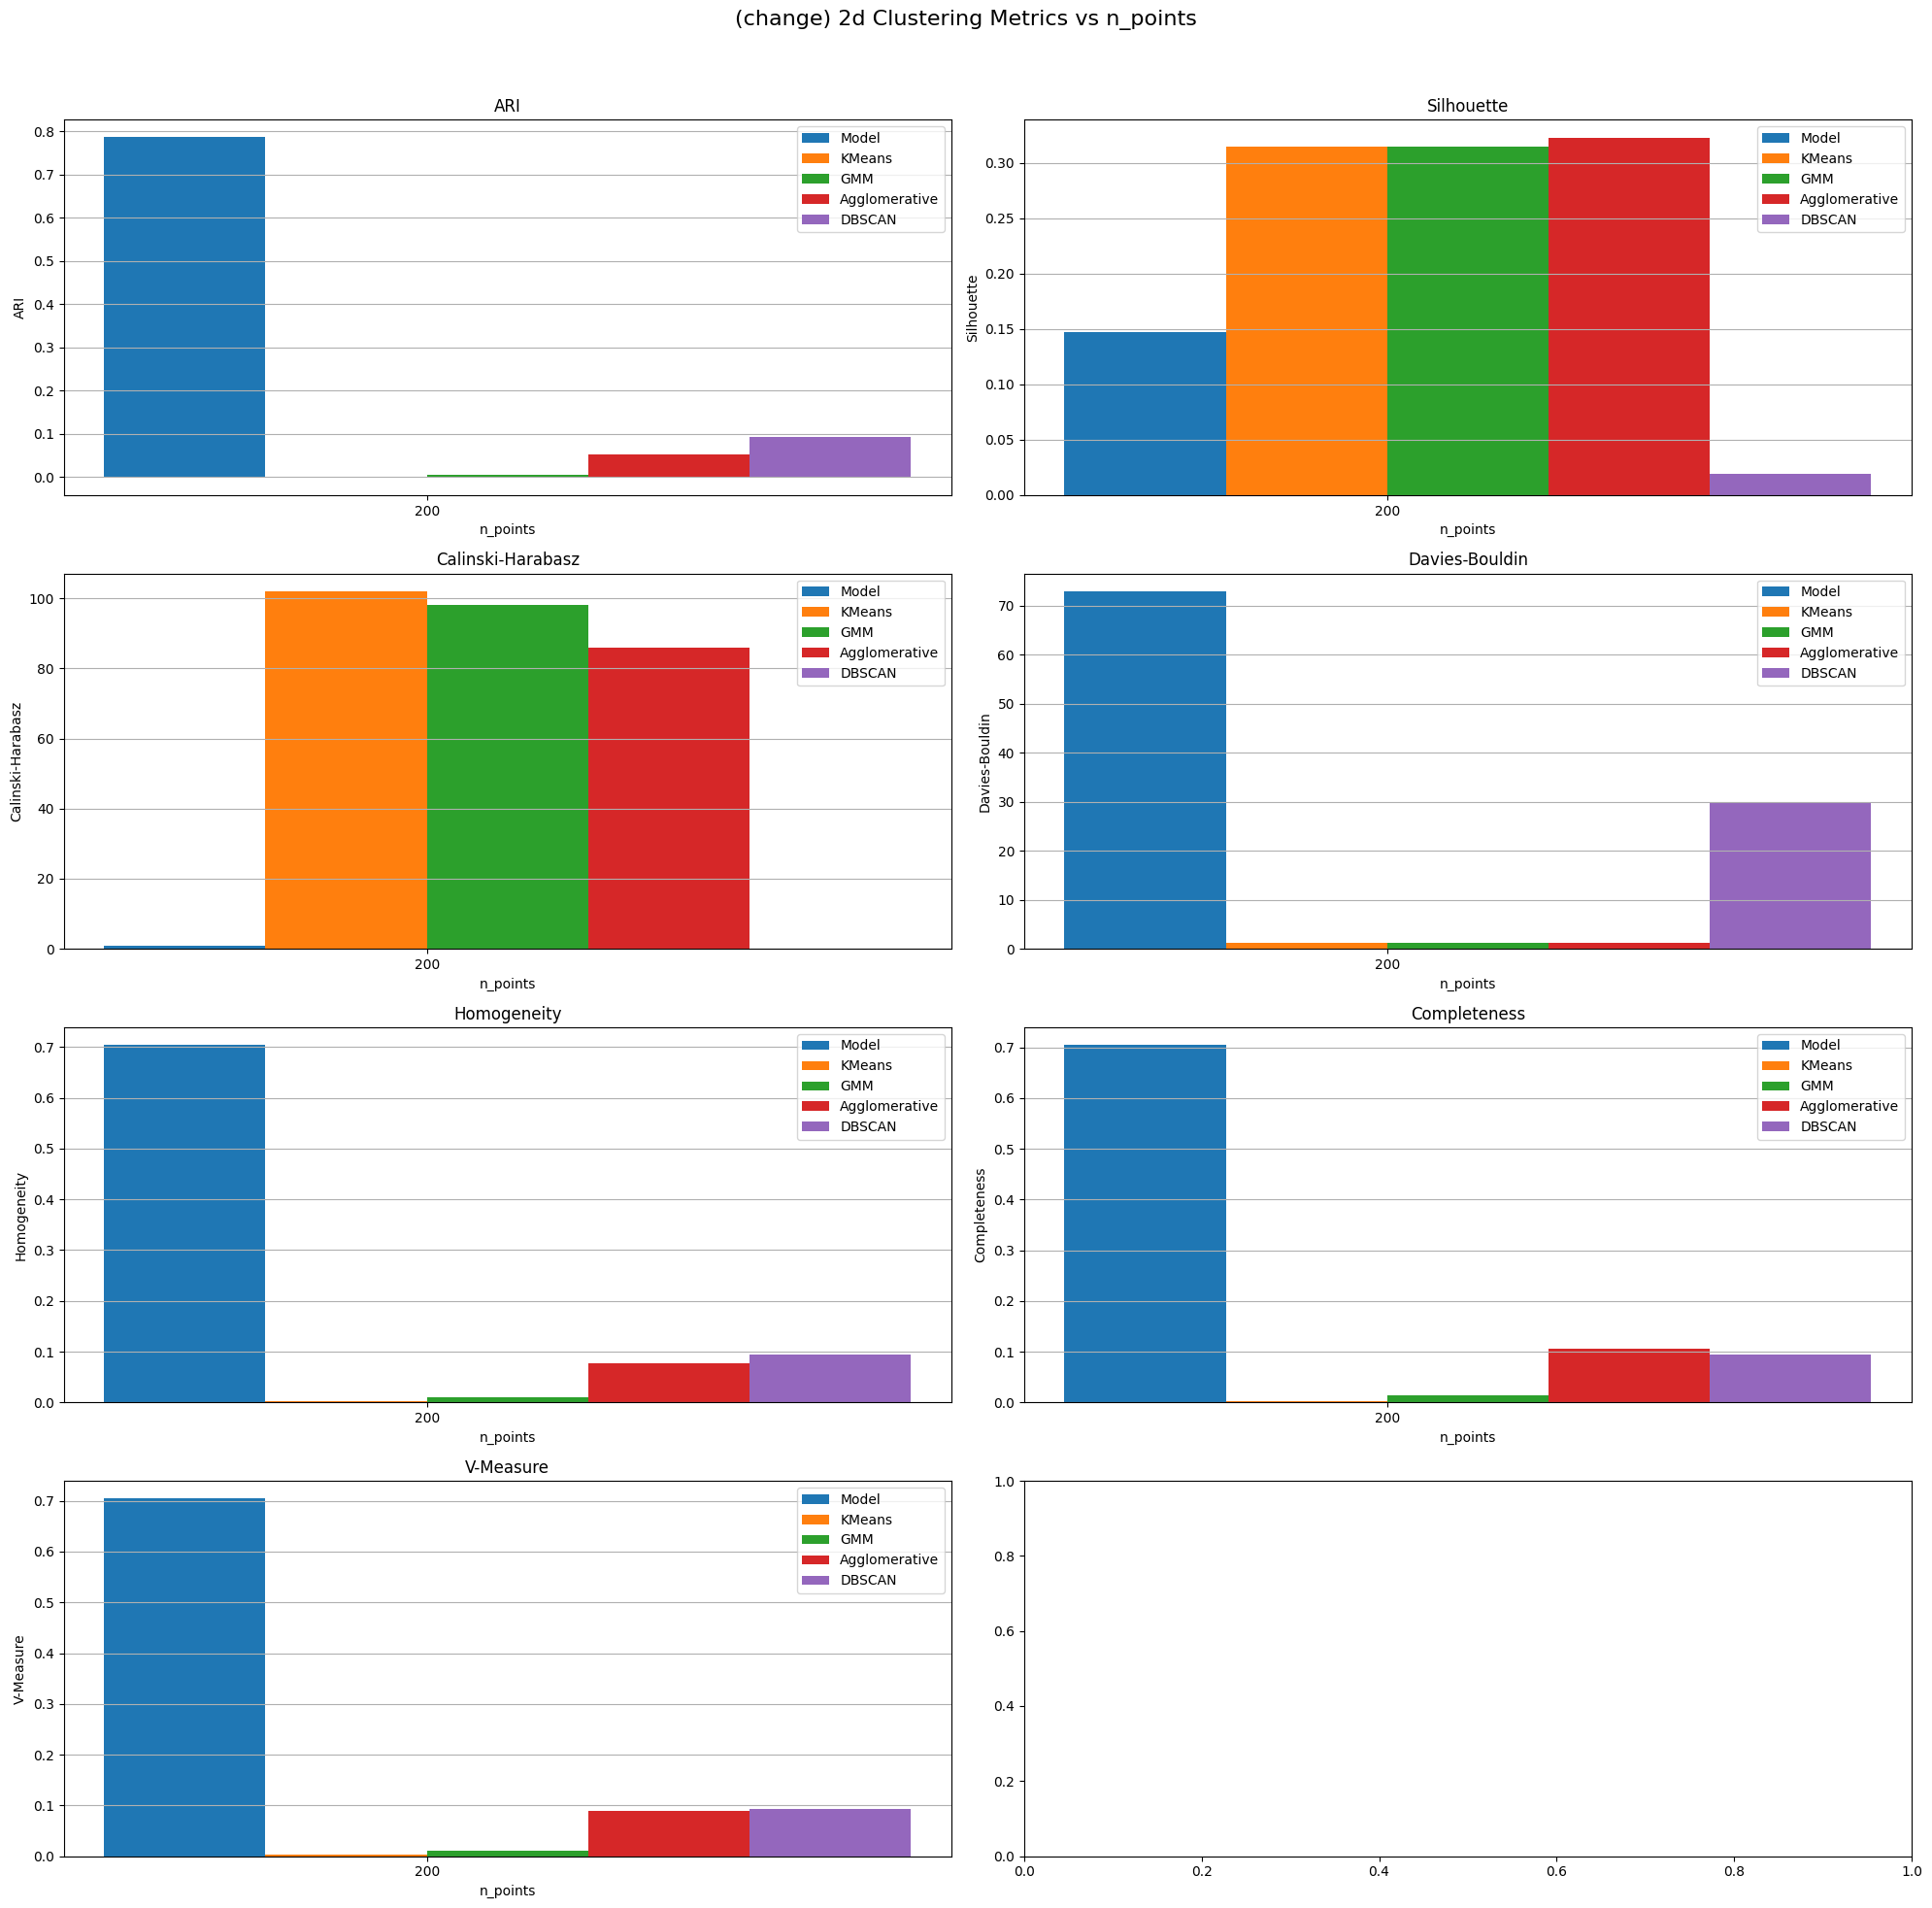

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import json

# 加载数据
with open("all_results_o2.json", "r") as f:
    data = json.load(f)

# 提取n_points和指标
n_points = sorted([int(k) for k in data.keys()])
metrics = ["ARI", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin", "Homogeneity", "Completeness", "V-Measure"]

# 创建画布
fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4行2列的子图布局
fig.suptitle("(change) 2d Clustering Metrics vs n_points", fontsize=16)

# 遍历每个指标，绘制子图
for i, metric in enumerate(metrics):
    # 计算子图的位置
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # 提取每种方法的指标值
    model_values = [data[str(n)]["model_metrics"][metric] for n in n_points]
    kmeans_values = [data[str(n)]["kmeans_metrics"][metric] for n in n_points]
    gmm_values = [data[str(n)]["gmm_metrics"][metric] for n in n_points]
    agglo_values = [data[str(n)]["agglomerative_metrics"][metric] for n in n_points]
    dbscan_values = [data[str(n)]["dbscan_metrics"][metric] for n in n_points]
    
    # 设置条形图的宽度和位置
    bar_width = 0.2
    x = np.arange(len(n_points))
    
    # 绘制条形图
    ax.bar(x - 1.5 * bar_width, model_values, width=bar_width, label="Model")
    ax.bar(x - 0.5 * bar_width, kmeans_values, width=bar_width, label="KMeans")
    ax.bar(x + 0.5 * bar_width, gmm_values, width=bar_width, label="GMM")
    ax.bar(x + 1.5 * bar_width, agglo_values, width=bar_width, label="Agglomerative")
    ax.bar(x + 2.5 * bar_width, dbscan_values, width=bar_width, label="DBSCAN")
    
    # 设置子图标题和标签
    ax.set_title(metric)
    ax.set_xlabel("n_points")
    ax.set_ylabel(metric)
    ax.set_xticks(x)  # 设置x轴刻度
    ax.set_xticklabels(n_points)
    ax.legend()
    ax.grid(True, axis="y")

# 调整布局
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 调整子图间距，避免标题重叠

# 保存图像
# plt.savefig("all_metrics_vs_n_points.png")
plt.show()